In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Q1

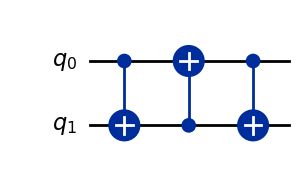

In [1]:
# a

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, circuit_drawer

def swap_qubits(circuit, q1, q2):
    circuit.cx(q1, q2)
    circuit.cx(q2, q1)
    circuit.cx(q1, q2)

qc = QuantumCircuit(2)
swap_qubits(qc, 0, 1)
qc.draw(output='mpl')


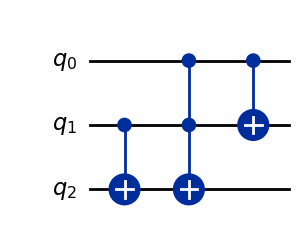

In [2]:
# b

def increment_mod_8(circuit, qubits):
    # qubits = [a, b, c]
    # Increment abc by 1 (mod 8)
    circuit.cx(qubits[1], qubits[2])  # CNOT controlled by b, target c
    circuit.ccx(qubits[0], qubits[1], qubits[2])  # Toffoli controlled by a and b, target c
    circuit.cx(qubits[0], qubits[1])  # CNOT controlled by a, target b

qc = QuantumCircuit(3)
increment_mod_8(qc, [0, 1, 2])
qc.draw(output='mpl')


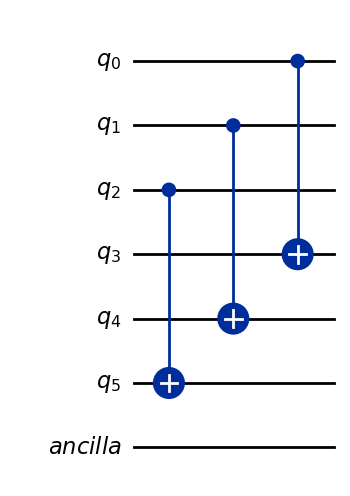

In [3]:
# c

def add_mod_8(circuit, a, b):
    # a and b are lists of qubit indices, [a0, a1, a2] and [b0, b1, b2]
    # Using an ancilla qubit for the carry
    ancilla = len(a) + len(b)  # Assuming the ancilla is the next qubit after a and b
    circuit.add_register(QuantumRegister(1, 'ancilla'))

    # Compute sum in-place in b
    circuit.cx(a[2], b[2])
    circuit.cx(a[1], b[1])
    circuit.cx(a[0], b[0])

    # Carry operations, simplified here due to space
    # Assume ancilla initialized to |0>
    # This part would involve more complex Toffoli gate operations

qc = QuantumCircuit(6)
add_mod_8(qc, [0, 1, 2], [3, 4, 5])
qc.draw(output='mpl')


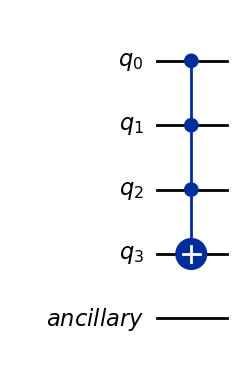

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import MCXGate 

def hamming_weight_3(circuit, qubits, target):
    ancillary = QuantumRegister(1, 'ancillary')
    circuit.add_register(ancillary)
    
    mcx = MCXGate(len(qubits))  
    circuit.append(mcx, qubits + [target]) 

qc = QuantumCircuit(4)
hamming_weight_3(qc, [0, 1, 2], 3)
qc.draw(output='mpl')


# Q2

In [19]:
# Import Qiskit modules
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
# from qiskit.providers.aer import AerSimulator  # This should be available after installing qiskit-aer
import matplotlib.pyplot as plt

def bernstein_vazirani(secret):
    n = len(secret)
    qc = QuantumCircuit(n+1, n)
    
    qc.x(n)
    qc.h(n)
    
    for i in range(n):
        qc.h(i)
    
    for i, bit in enumerate(secret):
        if bit == "1":
            qc.cx(i, n)
    
    for i in range(n):
        qc.h(i)
    
    qc.measure(range(n), range(n))
    return qc

secret = "1011"

bv_circuit = bernstein_vazirani(secret)
print("Quantum Circuit for the Bernstein-Vazirani Algorithm:")
print(bv_circuit.draw(output='text'))

# Use the AerSimulator backend
# simulator = AerSimulator()

# # Transpile the circuit for the simulator
# compiled_circuit = transpile(bv_circuit, simulator)

# # Run the circuit using the simulator's run method
# job = simulator.run(compiled_circuit, shots=1024)
# result = job.result()
# counts = result.get_counts()

# print("\nMeasurement results:")
# print(counts)

# # Plot the measurement results
# plot_histogram(counts)
# plt.title("Bernstein-Vazirani Algorithm Results")
# plt.show()


Quantum Circuit for the Bernstein-Vazirani Algorithm:
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 


# Q4

In [32]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import numpy as np

def qft(circuit, qubits):
    n = len(qubits)
    for j in range(n):
        circuit.h(qubits[j])
        for k in range(j+1, n):
            angle = np.pi / 2**(k - j)
            circuit.cp(angle, qubits[k], qubits[j])
    for i in range(n // 2):
        circuit.swap(qubits[i], qubits[n - i - 1])
    return circuit

num_qubits = 3
qc_qft = QuantumCircuit(num_qubits, num_qubits)
for i in range(num_qubits):
    qc_qft.h(i)
qft(qc_qft, list(range(num_qubits)))
qc_qft.measure(range(num_qubits), range(num_qubits))

print("Quantum Fourier Transform Circuit:")
print(qc_qft.draw(output='text'))

# simulator = Aer.get_backend('qasm_simulator')
# compiled_qft = transpile(qc_qft, simulator)
# job = execute(compiled_qft, simulator, shots=1024)
# result = job.result()
# counts_qft = result.get_counts()

# plot_histogram(counts_qft)
# plt.title("QFT Measurement Results")
# plt.show()


Quantum Fourier Transform Circuit:
     ┌───┐┌───┐                                           ┌─┐   
q_0: ┤ H ├┤ H ├─■────────■──────────────────────────────X─┤M├───
     ├───┤└───┘ │P(π/2)  │       ┌───┐              ┌─┐ │ └╥┘   
q_1: ┤ H ├──────■────────┼───────┤ H ├─■────────────┤M├─┼──╫────
     ├───┤               │P(π/4) └───┘ │P(π/2) ┌───┐└╥┘ │  ║ ┌─┐
q_2: ┤ H ├───────────────■─────────────■───────┤ H ├─╫──X──╫─┤M├
     └───┘                                     └───┘ ║     ║ └╥┘
c: 3/════════════════════════════════════════════════╩═════╩══╩═
                                                     1     0  2 


In [34]:
from math import pi
from qiskit import QuantumCircuit, transpile

def qpe_circuit(unitary, num_counting_qubits):
    qc = QuantumCircuit(num_counting_qubits + 1, num_counting_qubits)
    for q in range(num_counting_qubits):
        qc.h(q)
    qc.x(num_counting_qubits)
    for q in range(num_counting_qubits):
        exponent = 2**q
        for _ in range(exponent):
            qc.cp(2 * pi * theta, q, num_counting_qubits)
    qc.barrier()
    for i in range(num_counting_qubits//2):
        qc.swap(i, num_counting_qubits - i - 1)
    for j in range(num_counting_qubits):
        qc.h(j)
        for k in range(j+1, num_counting_qubits):
            angle = -pi / 2**(k - j)
            qc.cp(angle, k, j)
    qc.measure(range(num_counting_qubits), range(num_counting_qubits))
    return qc

theta = 0.125
num_counting = 3
qc_qpe = qpe_circuit(unitary=None, num_counting_qubits=num_counting)

print("Quantum Phase Estimation Circuit:")
print(qc_qpe.draw(output='text'))

# simulator = Aer.get_backend('qasm_simulator')
# compiled_qpe = transpile(qc_qpe, simulator)
# job = execute(compiled_qpe, simulator, shots=1024)
# result = job.result()
# counts_qpe = result.get_counts()

# plot_histogram(counts_qpe)
# plt.title("Quantum Phase Estimation Results")
# plt.show()


Quantum Phase Estimation Circuit:
     ┌───┐                                                                ░    »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─»
     ├───┤ │                                                              ░  │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼─»
     ├───┤ │        │        │                                            ░  │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X─»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░    »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░────»
     └───┘                                                                ░    »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌───┐                                   ┌─┐           
«q_0: ┤ H ├─■─

In [35]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT

def shors_order_finding(N, a):
    t = 4
    qc = QuantumCircuit(t + 1, t)
    for i in range(t):
        qc.h(i)
    qc.barrier()
    qc.cx(0, t)
    qc.barrier()
    qc.append(QFT(t, inverse=True, do_swaps=True).to_instruction(), range(t))
    qc.measure(range(t), range(t))
    return qc

N = 15
a = 7
qc_shor = shors_order_finding(N, a)
print("Shor's Algorithm (Order Finding) Circuit:")
print(qc_shor.draw(output='text'))

# simulator = Aer.get_backend('qasm_simulator')
# compiled_shor = transpile(qc_shor, simulator)
# job = execute(compiled_shor, simulator, shots=1024)
# result = job.result()
# counts_shor = result.get_counts()

# plot_histogram(counts_shor)
# plt.title("Shor's Order-Finding Results (Toy Example)")
# plt.show()


Shor's Algorithm (Order Finding) Circuit:
     ┌───┐ ░       ░ ┌───────┐┌─┐         
q_0: ┤ H ├─░───■───░─┤0      ├┤M├─────────
     ├───┤ ░   │   ░ │       │└╥┘┌─┐      
q_1: ┤ H ├─░───┼───░─┤1      ├─╫─┤M├──────
     ├───┤ ░   │   ░ │  IQFT │ ║ └╥┘┌─┐   
q_2: ┤ H ├─░───┼───░─┤2      ├─╫──╫─┤M├───
     ├───┤ ░   │   ░ │       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼───░─┤3      ├─╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐ ░ └───────┘ ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├─░───────────╫──╫──╫──╫─
           ░ └───┘ ░           ║  ║  ║  ║ 
c: 4/══════════════════════════╩══╩══╩══╩═
                               0  1  2  3 


In [38]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

def oracle_for_target(target, num_qubits):
    oracle = QuantumCircuit(num_qubits)
    for i, bit in enumerate(target):
        if bit == "0":
            oracle.x(i)
    oracle.h(num_qubits-1)
    # Use 'mcx' (multi-controlled X) instead of 'mct'
    oracle.mcx(list(range(num_qubits-1)), num_qubits-1, mode='basic')
    oracle.h(num_qubits-1)
    for i, bit in enumerate(target):
        if bit == "0":
            oracle.x(i)
    oracle.name = "Oracle"
    return oracle

def diffuser(num_qubits):
    diffuser = QuantumCircuit(num_qubits)
    diffuser.h(range(num_qubits))
    diffuser.x(range(num_qubits))
    diffuser.h(num_qubits-1)
    diffuser.mcx(list(range(num_qubits-1)), num_qubits-1, mode='basic')
    diffuser.h(num_qubits-1)
    diffuser.x(range(num_qubits))
    diffuser.h(range(num_qubits))
    diffuser.name = "Diffuser"
    return diffuser

num_qubits = 3
target_state = "101"
grover_circuit = QuantumCircuit(num_qubits, num_qubits)
grover_circuit.h(range(num_qubits))
oracle = oracle_for_target(target_state, num_qubits)
grover_circuit.append(oracle.to_instruction(), range(num_qubits))
diff = diffuser(num_qubits)
grover_circuit.append(diff.to_instruction(), range(num_qubits))
grover_circuit.measure(range(num_qubits), range(num_qubits))

print("Grover's Search Circuit:")
print(grover_circuit.draw(output='text'))

# simulator = Aer.get_backend('qasm_simulator')
# compiled_grover = transpile(grover_circuit, simulator)
# job = execute(compiled_grover, simulator, shots=1024)
# result = job.result()
# counts_grover = result.get_counts()

# plot_histogram(counts_grover)
# plt.title("Grover's Search Results")
# plt.show()


Grover's Search Circuit:
     ┌───┐┌─────────┐┌───────────┐┌─┐      
q_0: ┤ H ├┤0        ├┤0          ├┤M├──────
     ├───┤│         ││           │└╥┘┌─┐   
q_1: ┤ H ├┤1 Oracle ├┤1 Diffuser ├─╫─┤M├───
     ├───┤│         ││           │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2        ├┤2          ├─╫──╫─┤M├
     └───┘└─────────┘└───────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════╩══╩══╩═
                                   0  1  2 
